In [1]:
import zipfile

with zipfile.ZipFile("Sample - Superstore.csv (1).zip", 'r') as zip_ref:
    zip_ref.extractall()

print("File extracted successfully!")

File extracted successfully!


In [2]:
import os
os.listdir()

['.config',
 'Sample - Superstore.csv',
 'Sample - Superstore.csv (1).zip',
 'sample_data']

In [4]:
import pandas as pd

df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
total_revenue = df["Sales"].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 2297200.8603000003


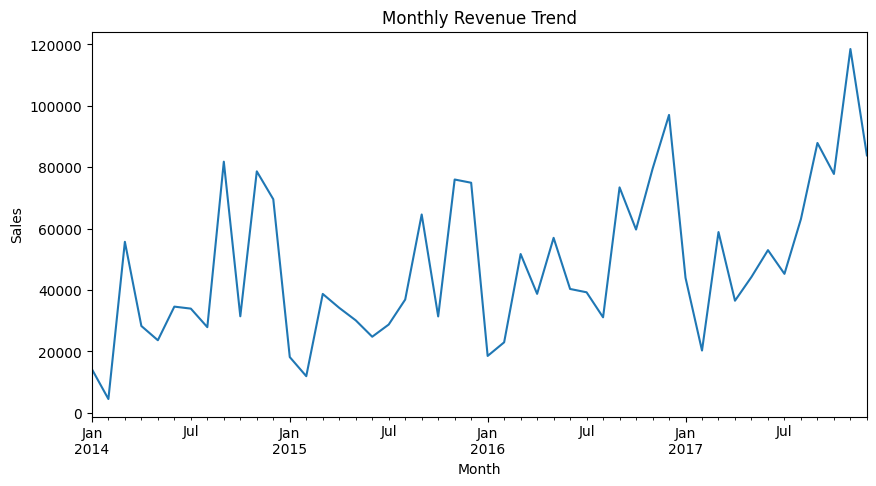

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Month"] = df["Order Date"].dt.to_period("M")

monthly_sales = df.groupby("Month")["Sales"].sum()

monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [8]:
top_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(5)

print(top_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


In [9]:
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

print(category_sales)

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


In [10]:
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

print(region_sales)

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64


Total Revenue: $2297200.86




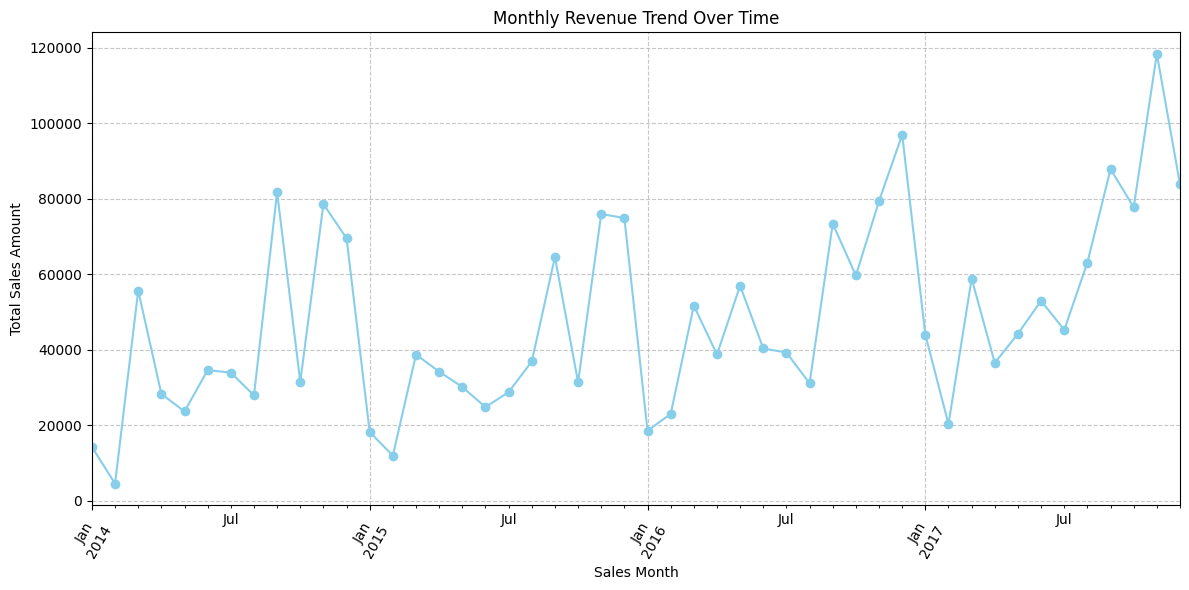

Top 5 Products by Sales:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


Category Performance:
Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


Region Performance:
Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

 ----Key Insights----
 1.Technology is the highest revenue generating category
 2.West region contributes the most to total sales
 3.High-value office equipment products dominate top sa

In [19]:
# BUSINESS SALES TASK 1: Comprehensive Sales Analysis for Superstore Data

             # SECTION 1: Setup and Data Loading
# Import necessary libraries for data manipulation and visualization.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset. We previously encountered a UnicodeDecodeError,
# so explicitly specifying 'latin1' encoding to ensure correct file reading.
df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')

# Convert the 'Order Date' column to datetime objects.
# This is crucial for time-series analysis like monthly trends.
df["Order Date"] = pd.to_datetime(df["Order Date"])

      #  SECTION 2: Key Performance Indicators (KPIs)

# Calculate the total revenue generated across all sales.
# Rounding to 2 decimal places for better readability in financial context.

total_sales_revenue = df["Sales"].sum()
print(f"Total Revenue: ${total_sales_revenue:.2f}") # Using f-string for clear output
print("\n")


      # SECTION 3: Time-Series Analysis: Monthly Revenue Trend

# Extract the month and year to group sales by month.
# 'to_period("M")' groups dates by their respective month, which is perfect for this analysis.

df["Month"] = df["Order Date"].dt.to_period("M")
monthly_revenue_data = df.groupby("Month")["Sales"].sum()
monthly_revenue_data = monthly_revenue_data.sort_index()

# Plotting the monthly revenue trend to visualize sales performance over time.

plt.figure(figsize=(12, 6)) # Adjusted figure size for slightly better clarity
monthly_revenue_data.plot(kind='line', marker='o', linestyle='-', color='skyblue') # Added markers and specific line style/color
plt.title("Monthly Revenue Trend Over Time") # More descriptive title
plt.xlabel("Sales Month") # More specific x-axis label
plt.ylabel("Total Sales Amount") # More specific y-axis label
plt.xticks(rotation=60) # Increased rotation for better readability of month labels
plt.grid(True, linestyle='--', alpha=0.7) # Added a subtle grid for easier trend following
plt.tight_layout() # Ensures all elements fit within the figure area
plt.show()


            # SECTION 4: Product Performance Analysis

# Identify the top 5 products by sales volume.
# This helps in understanding which products are driving the most revenue.

top_five_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(5)

print("Top 5 Products by Sales:")
print(top_five_products)
print("\n")


            #  SECTION 5: Category Performance Analysis

# Analyze sales performance across different product categories.
# This insight can guide inventory and marketing strategies.

category_sales_performance = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

print("Category Performance:")
print(category_sales_performance)
print("\n")

            # SECTION 6: Regional Performance Analysis

# Evaluate sales distribution and performance by geographical region.
# Useful for targeted regional strategies.

regional_sales_breakdown = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

print("Region Performance:")
print(regional_sales_breakdown)
            #final key in sights from sales
print("\n ----Key Insights----")
print(" 1.Technology is the highest revenue generating category")
print(" 2.West region contributes the most to total sales")
print(" 3.High-value office equipment products dominate top sales")
print(" 4.Revenue shows overall growth trend over the years")